Kimberly Adams <br>
DSC 530
September 2022

Download data files from github

In [140]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

In [141]:
# Import numpy package
import numpy as np

In [142]:
# Import datasets (nsfg and first) and author's functions (thinkstats2 and thinkplot)
import nsfg
import first
import thinkstats2
import thinkplot

In [143]:
# Read pregnancy data into a dataframe named 'preg'
preg = nsfg.ReadFemPreg()

# Filter preg dataframe into new dataframe 'live' containing only live births 
live = preg[preg.outcome == 1]

# Print list of column names
sorted(live)

['adj_mod_basewgt',
 'ageatend',
 'agecon',
 'agecon_i',
 'agepreg',
 'agepreg_i',
 'ageqtnur',
 'ageqtnur2',
 'ageqtnur3',
 'ageqtnur_n',
 'ageqtnur_n2',
 'ageqtnur_n3',
 'ageqtnur_p',
 'ageqtnur_p2',
 'ageqtnur_p3',
 'ager',
 'ager_i',
 'agescrn',
 'alivenow',
 'alivenow2',
 'alivenow3',
 'anynurse',
 'anynurse2',
 'anynurse3',
 'anyusint',
 'babysex',
 'babysex2',
 'babysex3',
 'basewgt',
 'bfeedwks',
 'bfeedwks_i',
 'bgnprena',
 'birthord',
 'birthord_i',
 'birthplc',
 'birthwgt_lb',
 'birthwgt_lb2',
 'birthwgt_lb3',
 'birthwgt_oz',
 'birthwgt_oz2',
 'birthwgt_oz3',
 'bpa_bdscheck1',
 'bpa_bdscheck2',
 'bpa_bdscheck3',
 'brnout',
 'caseid',
 'cmbabdob',
 'cmbirth',
 'cmfstprg',
 'cmintfin',
 'cmintfincr',
 'cmintfinop',
 'cmintstr',
 'cmintstrcr',
 'cmintstrop',
 'cmintvw',
 'cmkidied',
 'cmkidied2',
 'cmkidied3',
 'cmkidlft',
 'cmkidlft2',
 'cmkidlft3',
 'cmlastlb',
 'cmlstprg',
 'cmotpreg',
 'cmprgbeg',
 'cmprgend',
 'cnfrmno',
 'cohpbeg',
 'cohpend',
 'datecon',
 'datecon_i',
 '

# Chapter 3
### Excercise 3-1

Use the NSFG respondent variable `numkdhh` to construct the actual distribution for the number of children under 18 in the household. 

In [144]:
# Import respondent dataset into dataframe 'resp'
resp = nsfg.ReadFemResp()

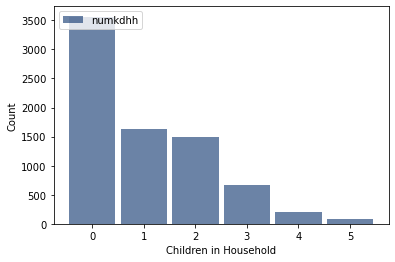

In [145]:
# Create a histogram for the `numkdhh` variable
hist = thinkstats2.Hist(resp.numkdhh, label="numkdhh")
thinkplot.Hist(hist)
thinkplot.Config(xlabel="Children in Household", ylabel="Count")

Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household. 

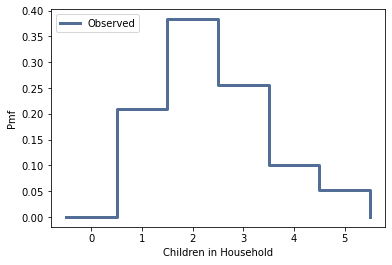

In [146]:
# Calculating the PMF for the `numkdhh` variable
pmf = thinkstats2.Pmf(resp.numkdhh, label="Actual = numkdhh")

# Calculate the biased distribution
biased_pmf = BiasPmf(pmf, label="Observed")

thinkplot.Pmf(biased_pmf)
thinkplot.Config(xlabel="Children in Household", ylabel="Pmf")

Plot the actual and biased distributions

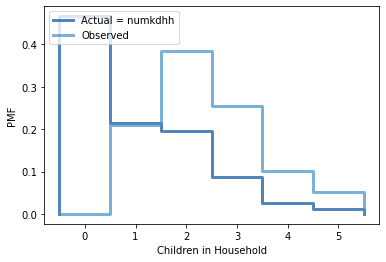

In [147]:
# Plot histogram pair for actual vs observed number of children
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Config(xlabel="Children in Household", ylabel="PMF")

Compute the means.

In [148]:
print("Actual mean", pmf.Mean())
print("Observed mean", biased_pmf.Mean())

Actual mean 1.024205155043831
Observed mean 2.403679100664282


### Excercise 3-2

Write functions called PmfMean and PmfVar that take a Pmf object and compute the mean and variance. 

In [149]:
def PmfMean(pmf):
    # To calculate the mean of the pmf, we need to multiply each value with its probability and sum the resulting values.
    my_pmf_mean = 0
    for value, prob in pmf.d.items():
        my_pmf_mean += value * prob
    return my_pmf_mean

PmfMean(pmf)

1.024205155043831

In [150]:
def PmfVar(pmf):
    # To calculate the variance, we multiply the probability by the difference between the actual value and the mean and then sum the resulting values, then square it.
    pmfMean = PmfMean(pmf)
    
    return sum(prob * (value - pmfMean) ** 2 for value, prob in pmf.d.items())

PmfVar(pmf)

1.4128643263531195

To test these methods, check that they are consistent with the methods Mean and Var provided by Pmf.

In [151]:
print("Given mean =", pmf.Mean())
print("Given variance =", pmf.Var())

Given mean = 1.024205155043831
Given variance = 1.4128643263531195


My values match the prewritten functions.

# Chapter 4

### Excercise 4-1

How much did you weigh at birth?

*I was the first child born to my family and weighed 7 lbs 11oz.*

Using the NSFG data (all live births), compute the distribution of birth weights and use it to find your percentile rank. If you were a first baby, find your percentile rank in the distribution for first babies.

In [152]:
# Divide the live birth data into two dataframes: first births and other births
live, firsts, other = first.MakeFrames()

# Create dataframe of birth weights for first children and then drop rows with no data.
first_wgt = firsts.totalwgt_lb
first_wgt_dropna = first_wgt.dropna()
 
# Create dataframe of birth weights for other children and then drop rows with no data.
other_wgt = others.totalwgt_lb
other_wgt_dropna = other_wgt.dropna()

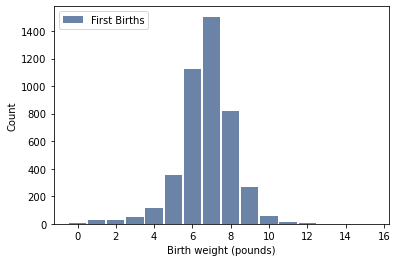

In [153]:
# Round down values to simplify distribution
FstWgtRd = np.floor(first_wgt_dropna)

# Plot raw data distribution for first births
hist1st = thinkstats2.Hist(FstWgtRd, label="First Births")
thinkplot.Hist(hist1st)
thinkplot.Config(xlabel="Birth weight (pounds)", ylabel="Count")

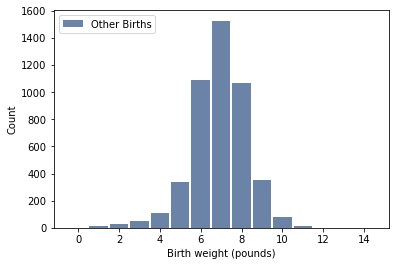

In [154]:
# Round down values to simplify distribution
OthWgtRd = np.floor(other_wgt_dropna)

# Plot raw data distribution for other births
histOth = thinkstats2.Hist(OthWgtRd, label="Other Births")
thinkplot.Hist(histOth)
thinkplot.Config(xlabel="Birth weight (pounds)", ylabel="Count")

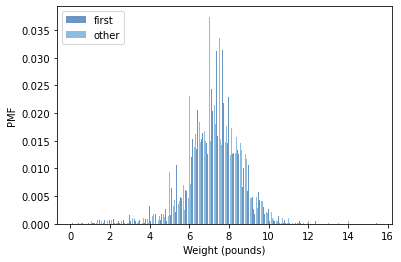

In [155]:
# Calculate PMF for both first births and other children.
first_pmf = thinkstats2.Pmf(first_wgt_dropna, label='first')
other_pmf = thinkstats2.Pmf(other_wgt_dropna, label='other')

width = 0.4 / 16

# plot PMFs of birth weights for first babies and others
thinkplot.PrePlot(2)
thinkplot.Hist(first_pmf, align='right', width=width)
thinkplot.Hist(other_pmf, align='left', width=width)
thinkplot.Config(xlabel='Weight (pounds)', ylabel='PMF')

In [156]:
# Calculate percentile ranking for my birth weight of 7 lbs 11oz
def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1

    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank

PercentileRank(first_wgt_dropna, 7.7)

66.10130644052258

*Looks like my birth weight is in the 66th percentile.*

### Excercise 4-2

The numbers generated by `numpy.random.random` are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.

Generate 1000 numbers from `numpy.random.random`.

In [157]:
RandomNums = np.random.random(1000)

Plot their PMF.  What goes wrong?

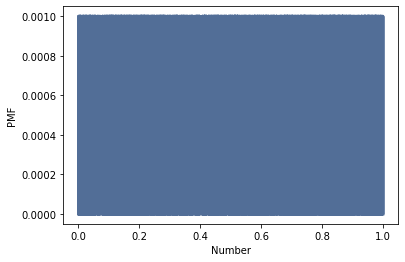

In [158]:
# Calculate PMF 
RandomNums_pmf = thinkstats2.Pmf(RandomNums)


# Plot raw data distribution for the random 1000 numbers
thinkplot.pmf(RandomNums_pmf)
thinkplot.Config(xlabel="Number", ylabel="PMF")

*I get a solid block in the PMF graph. This is probably because every value has an equal chance of being in the sample.*

Now plot the CDF. Is the distribution uniform?

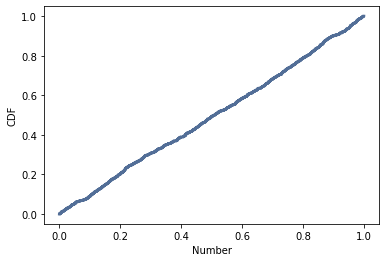

In [159]:
cdf = thinkstats2.Cdf(RandomNums)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Number', ylabel='CDF')

*The CDF is a straight line which shows that the distribution is uniform.*